# Periodically polled KTP crystal

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from main import *
# import matplotlib.gridspec as gridspec
from custom_poling.core.target import Target
from custom_poling.core.custom_crystal import CustomCrystal
from custom_poling.core.custom_crystal import Crystal
import numdifftools as nd ####NOT IN PACKAGE!!!!!!!!! 
from custom_poling.utils.sellmeier import Sellmeier
from custom_poling.utils.wavenumbers import Wavenumbers

In [35]:
# Define the central frequencies of the two downconverted modes and the pump
omega_s_0 = 1265832916458229.0 # signal mode central frequency
omega_i_0 = 1265832916458229.0 # idler mode central frequency
omega_p_0 = omega_s_0 + omega_i_0 # pump mode central frequency

print(f"omega_s_0 = {omega_s_0:4}")
print(f"omega_i_0 = {omega_i_0}")
print(f"omega_p_0 = {omega_p_0}")

# Generate the Sellmeier equations for KTP
sel_y = Sellmeier(3.0065, 0.03901, 0.04547, 0.01408)
sel_z = Sellmeier(3.3134, 0.05694, 0.05658, 0.01692)

# Generate the wave-vectors as a function of frequency
c=3e8
k_s = lambda omega: omega * sel_z.n(2*np.pi*c*1e6/omega)/c
k_i = lambda omega: omega * sel_y.n(2*np.pi*c*1e6/omega)/c
k_p = lambda omega: omega * sel_y.n(2*np.pi*c*1e6/omega)/c

# Generate the phase-mismatch as a function of downconverted frequencies
delta_k = lambda omega_s,omega_i:k_s(omega_s)+k_i(omega_i)-k_p(omega_s+omega_i)

# Compute the group velocity dispersion at the center frequencies
k_s_gradient = nd.Gradient(k_s,step=1.0e10)([omega_s_0])
k_i_gradient = nd.Gradient(k_i,step=1.0e10)([omega_i_0])
gvd = k_s_gradient-k_i_gradient # group velocity dispersion

print("k_s'-k_i' = ", gvd)



omega_s_0 = 1265832916458229.0
omega_i_0 = 1265832916458229.0
omega_p_0 = 2531665832916458.0
k_s'-k_i' =  3.132950690109289e-10


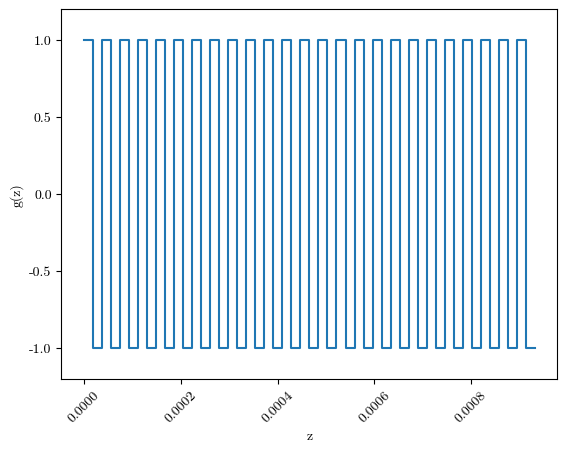

In [44]:
# Crystal properties
delta_k_0 = delta_k(omega_s_0,omega_i_0) # central phase-mismatch
domain_width = np.pi/delta_k_0
number_domains = 501
L=number_domains*domain_width # crystal length

domain_config = [1,-1]*int(number_domains/2)
crystal = Crystal(domain_width,number_domains,z0=0)

crystal.plot_domains(domain_config,n_max=51,fix_ticks=True)

In [ ]:
# Numerical integration parameters
k_range = 20000.
k_array = np.linspace(delta_k_0-k_range/2,delta_k_0+k_range,5000)

# Print some parameters
print(f'domain width = {domain_width*1e6} um')
print(f'length = {L*1e2} cm')
print(f'number of domains = {number_domains}')
print(f'k_0 = {delta_k_0} m^-1')
print(f'max amplitude for equivalent periodically-poled crystal = ' + str(2/np.pi))

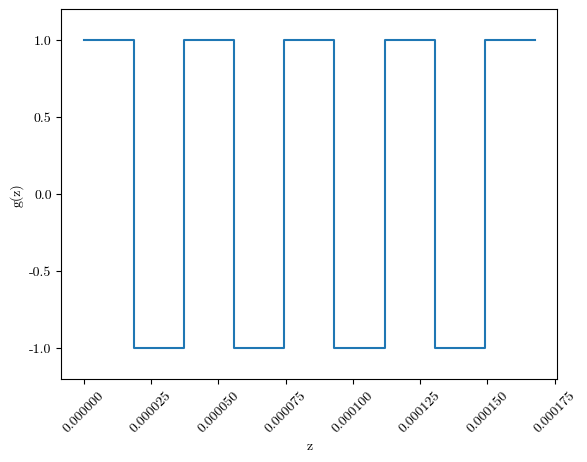

In [23]:
domain_config = [1,-1]*int(number_domains/2)

crystal = Crystal(domain_width,number_domains,z0=0)

crystal.plot_domains(domain_config,n_max=10,fix_ticks=True)

In [ ]:
k0=np.pi/domain_width

# Specify and plot the domain configuration


crystal.plot_domains(domain_config,n_max=10,fix_ticks=True)

# Compute and plot the phase-matching function (PMF) for an periodically-poled crystal

k_array = np.arange(k0-2000,k0+2000,10)
pmf_periodically_poled = crystal.compute_pmf(domain_config,k_array)